In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [4]:
np.random.seed(3)
feature_1 = np.random.normal(loc=5,scale=2,size=100)
feature_2 = np.random.normal(loc=4,scale=1,size=100)   
feature_3 = np.random.normal(loc=3,scale=3,size=100)
feature_4 = np.random.normal(loc=2,scale=4,size=100)
feature_5 = np.random.normal(loc=1,scale=5,size=100)
feature_6 = np.random.normal(loc=6,scale=6,size=100)
feature_7 = (2*feature_1)+(3*feature_2)+np.random.normal(size = 100)
feature_8 = (2*feature_4)+(3*feature_3)+np.random.normal(size = 100)
feature_9 = (2*feature_5)+(3*feature_4)+np.random.normal(size = 100)
feature_10 = (2*feature_6)+(3*feature_5)+np.random.normal(size = 100)
data = np.column_stack((feature_1, feature_2, feature_3, feature_4, feature_5, feature_6, feature_7, feature_8, feature_9, feature_10))
training_data = pd.DataFrame(data, columns=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10'])



In [5]:
training_data

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
0,8.577257,4.874286,2.035246,-2.118838,1.445267,16.891838,33.445396,1.280218,-4.398904,38.342491
1,5.873020,2.706463,3.453391,-2.120834,4.894485,1.102500,20.125118,5.249472,2.186095,17.614182
2,5.192995,3.920259,2.944117,-0.449538,7.323225,7.715906,22.257011,6.426912,13.955750,37.382107
3,1.273015,4.564486,4.450586,7.599862,-3.402557,3.608303,16.819029,28.443684,14.162198,-2.213441
4,4.445224,5.233471,5.306895,-1.398429,2.182028,8.617393,22.878514,14.124775,1.132039,25.045607
...,...,...,...,...,...,...,...,...,...,...
95,4.781091,3.217291,-1.917889,6.391118,7.858290,-1.450439,20.887617,7.275637,34.942956,20.003248
96,6.358143,5.988490,4.088410,10.185331,2.472661,15.774672,30.075548,32.301146,36.597684,38.989828
97,3.289126,5.195058,-0.477109,4.667951,-2.265691,14.660951,21.498842,7.417414,8.933679,22.872445
98,4.399588,3.904762,7.509786,2.316369,5.398940,9.009238,19.694012,25.307185,16.336593,35.775255


In [19]:
X = np.array(training_data)


In [20]:
covariance_matrix = np.cov(X.T)  
     
Q, S, Qt = np.linalg.svd(covariance_matrix)

In [41]:
total_variance = np.sum(S)
variance_sum = 0
num_components = 0
preserved_variance_percentage=0.90

In [42]:
total_variance

np.float64(887.7032592016045)

In [43]:
for variance in S:
        variance_sum += variance
        num_components += 1
        if (variance_sum / total_variance) >= preserved_variance_percentage:
            break

In [44]:
principal_components = Qt[:num_components].T   
projected_X = np.dot(X, principal_components)
 
projected_X = pd.DataFrame(projected_X, columns=[f"PC{i+1}" for i in range(num_components)])

In [45]:
principal_components

array([[-2.09241948e-03,  2.05907860e-03, -1.63570748e-02],
       [ 3.62158104e-05, -5.72222501e-03,  1.11494265e-02],
       [ 9.58558810e-03,  4.51838063e-02,  2.74098347e-01],
       [ 8.80900222e-02,  2.19741144e-01, -6.42441559e-02],
       [ 1.61385854e-01, -6.79407849e-02, -1.47911955e-01],
       [ 1.34544775e-01, -1.73287388e-01,  3.11485610e-01],
       [-1.22964892e-02, -1.74529322e-02, -1.05695341e-02],
       [ 2.05386206e-01,  5.72847054e-01,  7.17847361e-01],
       [ 5.93745203e-01,  5.24693049e-01, -5.02662409e-01],
       [ 7.43725844e-01, -5.57879604e-01,  1.82657174e-01]])

In [47]:
training_data

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
0,8.577257,4.874286,2.035246,-2.118838,1.445267,16.891838,33.445396,1.280218,-4.398904,38.342491
1,5.873020,2.706463,3.453391,-2.120834,4.894485,1.102500,20.125118,5.249472,2.186095,17.614182
2,5.192995,3.920259,2.944117,-0.449538,7.323225,7.715906,22.257011,6.426912,13.955750,37.382107
3,1.273015,4.564486,4.450586,7.599862,-3.402557,3.608303,16.819029,28.443684,14.162198,-2.213441
4,4.445224,5.233471,5.306895,-1.398429,2.182028,8.617393,22.878514,14.124775,1.132039,25.045607
...,...,...,...,...,...,...,...,...,...,...
95,4.781091,3.217291,-1.917889,6.391118,7.858290,-1.450439,20.887617,7.275637,34.942956,20.003248
96,6.358143,5.988490,4.088410,10.185331,2.472661,15.774672,30.075548,32.301146,36.597684,38.989828
97,3.289126,5.195058,-0.477109,4.667951,-2.265691,14.660951,21.498842,7.417414,8.933679,22.872445
98,4.399588,3.904762,7.509786,2.316369,5.398940,9.009238,19.694012,25.307185,16.336593,35.775255


In [48]:
projected_X

,PC1,PC2,PC3
0,28.077196,-26.958121,15.436013
1,16.001130,-6.860637,6.310486
2,39.332411,-12.051153,6.306200
3,13.043658,26.119478,15.106282
4,23.349060,-7.416257,17.794881
...,...,...,...
95,38.469406,12.004812,-11.501491
96,60.436609,14.929775,16.571793
97,25.581069,-5.604202,9.259785
98,43.612764,1.673881,20.170214


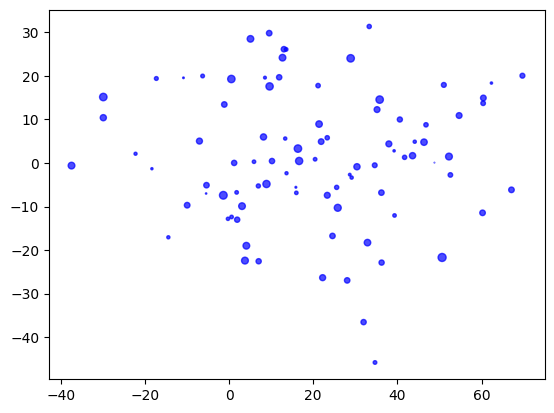

In [50]:
plt.scatter(projected_X['PC1'], projected_X['PC2'],projected_X['PC3'], color='blue', alpha=0.7)
plt.show()